<B><center>Bouston houses price analysis

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [44]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [45]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [46]:
boston_df=boston_df.drop("Unnamed: 0", axis=1)
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [47]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [48]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Task 2: Generate Descriptive Statistics and Visualizations

"Median value of owner-occupied homes"

In [49]:
boston_df['MEDV'].head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

<Axes: xlabel='MEDV'>

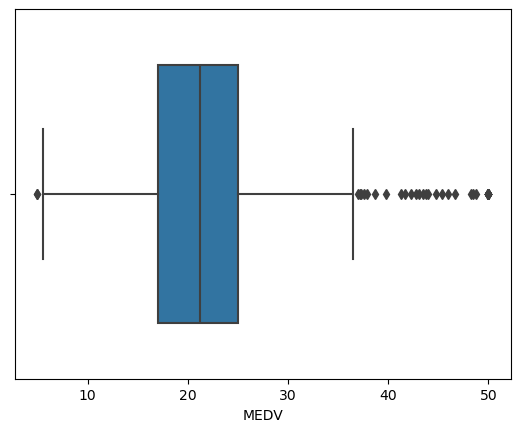

In [50]:
sns.boxplot(x=boston_df['MEDV'], width=.7)

 <B>Bar plot for the Charles river variable

In [63]:
boston_df['CHAS']=boston_df['CHAS'].astype(int)
values=boston_df['CHAS'].value_counts()
category= values.index
height= values.values
print(category)

Index([0, 1], dtype='int64', name='CHAS')


Text(0.5, 1.0, 'bar plot of Charles river variable')

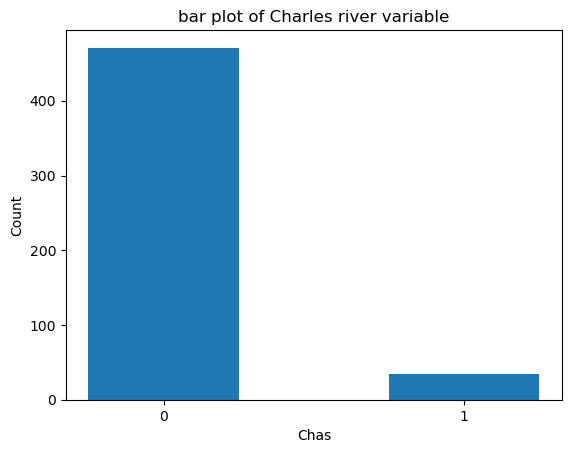

In [65]:
plt.bar(category,height,tick_label=category,width=0.5)
plt.xlabel('Chas')
plt.ylabel('Count')
plt.title('bar plot of Charles river variable')

In [67]:
boston_df.loc[(boston_df['AGE']<=35),'age_group'] ='35 year and younger'
boston_df.loc[(boston_df['AGE']<70) & (boston_df['AGE']>35),'age_group']= 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'age_group'] ='70 year and older'


<Axes: xlabel='MEDV', ylabel='age_group'>

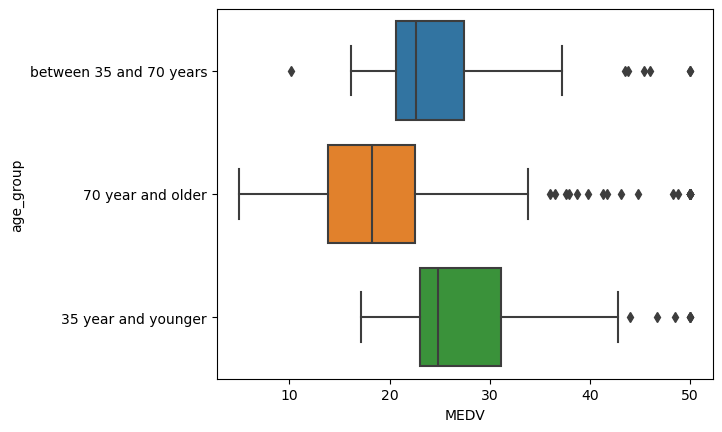

In [70]:
sns.boxplot(data=boston_df,x='MEDV', y='age_group')

<B>To show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



In [71]:
df= boston_df[['NOX','INDUS']]


<Axes: xlabel='NOX', ylabel='INDUS'>

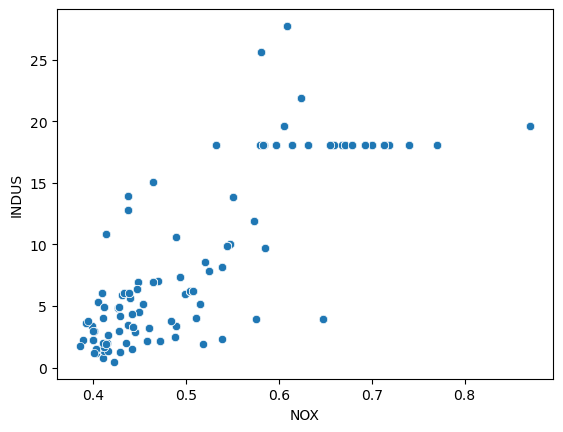

In [74]:
sns.scatterplot(data=df,x='NOX',y='INDUS')

proportion of non-retail business acres per town is directly proprotional  nitric oxides concentration (parts per 10 million)

<B>Create a histogram for the pupil to teacher ratio variable

/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


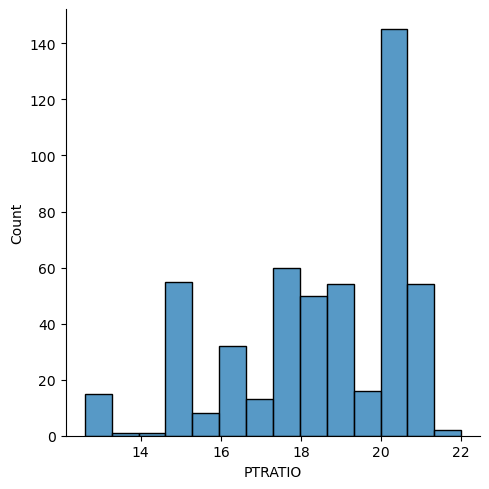

In [81]:
sns.displot(data=boston_df['PTRATIO'],kind='hist')

<B>Task 3: Use the appropriate tests to answer the questions provided.

<B>Is there a significant difference in median value of houses bounded by the Charles river or not? 

<B><center> state hypothesis
<B>Null hypothesis: There is no statisticaly significant difference in median value of houses bounded by the Charles river  

<B>Alternate hypotheis: There is statisticaly significant difference in median value of houses bounded by the Charles river

alpha_level= 0.05

In [106]:
sample1=boston_df.loc[boston_df['CHAS']==0,'MEDV']
sample2=boston_df.loc[boston_df['CHAS']==1,'MEDV']

In [96]:
stat, p = stats.levene(sample1, sample2)
if p > 0.05:
    print("Variances are equal, use equal_var=True")
else:
    print("Variances are not equal, use equal_var=False")

Variances are not equal, use equal_var=False


In [103]:
t_statistic, p_value = stats.ttest_ind(sample1,sample2, equal_var=False)

In [105]:
print("\nT statistic Results: ")
print(f"T-statistic:{t_statistic:.4f}")
print(f"p-value:{p_value:.4f}")


T statistic Results: 
T-statistic:-3.1133
p-value:0.0036


we reject the null hypothesis as there is  statisticaly significant difference in median value of houses bounded by the Charles river


<B>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

ANOVA
NULL HYPOTHESIS: sample of all group is derived from population with same mean value

In [110]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'age_group'],
      dtype='object')

In [119]:
boston_df['age_group'].value_counts()

age_group
70 year and older          287
between 35 and 70 years    128
35 year and younger         91
Name: count, dtype: int64

In [132]:
older_70year=boston_df[boston_df['age_group'] == '70 year and older']['MEDV']    
between_35_70year= boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']  
younger_35year=boston_df[boston_df['age_group'] == '35 year and younger']['MEDV']
print(younger_35year)

16     23.1
38     24.7
39     30.8
40     34.9
41     26.6
       ... 
349    26.6
352    18.6
354    18.2
355    20.6
495    23.1
Name: MEDV, Length: 91, dtype: float64


In [133]:
print(len(older_70year), len(between_35_70year), len(younger_35year))

287 128 91


In [134]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(older_70year, between_35_70year, younger_35year)

# Print results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 36.4076
P-value: 0.0000


In [135]:
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


 Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

In [139]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Display the results
print(f"Pearson Correlation Coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.7637
P-value: 0.0000


These results point to a strong and statistically significant positive linear relationship between 'NOX' (nitric oxide concentration) and 'INDUS' (proportion of non-retail business acres). 


<B>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

In [145]:
#X is input variable/ independent variable
#y is output / dependent variable
import statsmodels.api as sm

X= boston_df['DIS']
y=boston_df['MEDV']

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predection =model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        10:57:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The regression shows a statistically significant, positive relationship between 'DIS' (distance to employment centers) and 'MEDV' (median home value). However, the low R-squared value and violations of OLS assumptions (e.g., residual normality, autocorrelation) suggest that the model may not fully capture the factors influencing 'MEDV'. Adding more variables or transforming the data might improve the model's fit


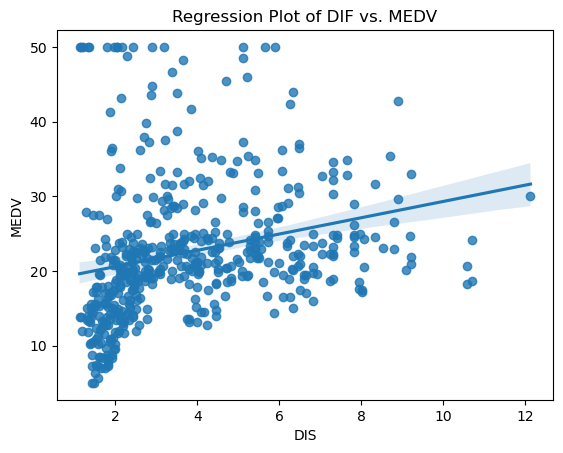

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot for 'DIF' vs. 'MEDV'
sns.regplot(x=boston_df['DIS'], y=boston_df['MEDV'])

# Add labels and title
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.title('Regression Plot of DIF vs. MEDV')

# Show the plot
plt.show()